In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from tensorflow.keras.datasets import cifar10

In [31]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [32]:
x_train.shape

(50000, 32, 32, 3)

In [33]:
x_train[0].max()

255

In [34]:
x_train = x_train/255

In [35]:
x_test = x_test/255

In [36]:
from tensorflow.keras.utils import to_categorical

In [37]:
y_cat_train = to_categorical(y_train,10)

In [38]:
y_cat_test = to_categorical(y_test,10)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [40]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(256, activation='relu'))


model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop =  EarlyStopping(monitor='val_loss',patience=2)

In [45]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.5122 - accuracy: 0.4516 - val_loss: 1.3016 - val_accuracy: 0.5344
Epoch 2/15
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.1886 - accuracy: 0.5801 - val_loss: 1.2195 - val_accuracy: 0.5634
Epoch 3/15
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.0314 - accuracy: 0.6403 - val_loss: 1.0497 - val_accuracy: 0.6366
Epoch 4/15
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.9212 - accuracy: 0.6801 - val_loss: 0.9869 - val_accuracy: 0.6590
Epoch 5/15
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.8291 - accuracy: 0.7119 - val_loss: 1.0507 - val_accuracy: 0.6398
Epoch 6/15
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.7501 - accuracy: 0.7403 - val_loss: 0.9859 - val_accuracy: 0.6644
Epoch 7/15
50000/50000 [==============================] 

In [47]:
metrics =  pd.DataFrame(model.history.history)

In [48]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.512233,0.45156,1.301597,0.5344
1,1.188619,0.58012,1.219487,0.5634
2,1.031397,0.64026,1.049690,0.6366
3,0.921212,0.68008,0.986871,0.6590
4,0.829115,0.71192,1.050662,0.6398
5,0.750096,0.74034,0.985878,0.6644
6,0.671154,0.76862,0.983450,0.6751
7,0.608599,0.78846,1.006565,0.6747
8,0.544266,0.80876,1.050043,0.6704


In [49]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

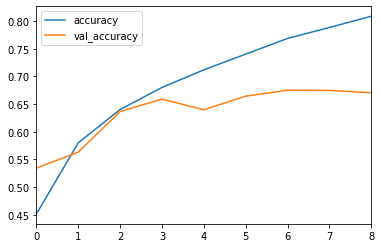

In [50]:
metrics[['accuracy','val_accuracy']].plot()

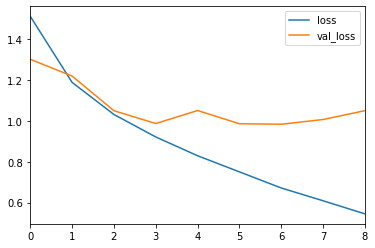

In [51]:
metrics[['loss','val_loss']].plot()

In [52]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0500425872802734, 0.6704]

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
predictions = model.predict_classes(x_test)

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.60      0.69      1000
           1       0.78      0.81      0.79      1000
           2       0.62      0.49      0.55      1000
           3       0.47      0.54      0.50      1000
           4       0.56      0.70      0.62      1000
           5       0.60      0.54      0.57      1000
           6       0.73      0.74      0.73      1000
           7       0.74      0.72      0.73      1000
           8       0.74      0.81      0.77      1000
           9       0.73      0.76      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



g:\anaconda\envs\my_tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


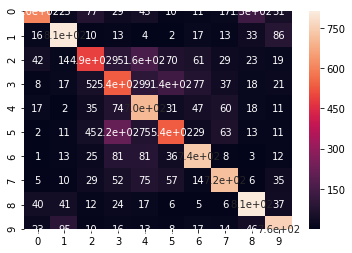

In [56]:

import seaborn as sns
sns.heatmap((confusion_matrix(y_test,predictions)),annot=True)

In [57]:
my_image = x_test[0]

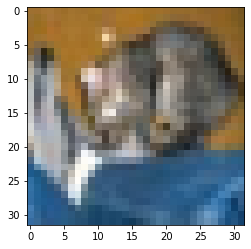

In [58]:
plt.imshow(my_image)

In [59]:
y_test[0]

array([3], dtype=uint8)

In [60]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3], dtype=int64)